# Red Wine Quality Prediction

Description: The objective of this classification model is to predict the wine quality. There are 11 inputs variable to determine the quality of wine. The target variable is quality determining the score between 0 to 10.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [35]:
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


# Loading the Dataset

In [3]:
import pandas as pd
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
pd.set_option('display.max_rows',None)

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5


In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
#check null values if any exist

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
# Observation :  no null values in this dataset

# EDA

In [13]:
# See the distribution by histogram 

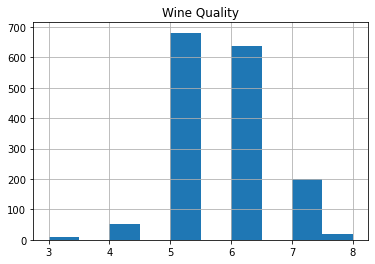

In [14]:
df['quality'].hist(grid=True)
plt.title('Wine Quality')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


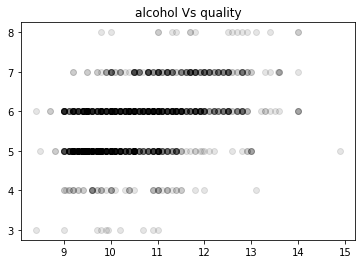

In [15]:
plt.scatter(df['alcohol'],df['quality'],alpha=.10,c=(0,0,0))
plt.title('alcohol Vs quality')
plt.show()

# Checking Correlation

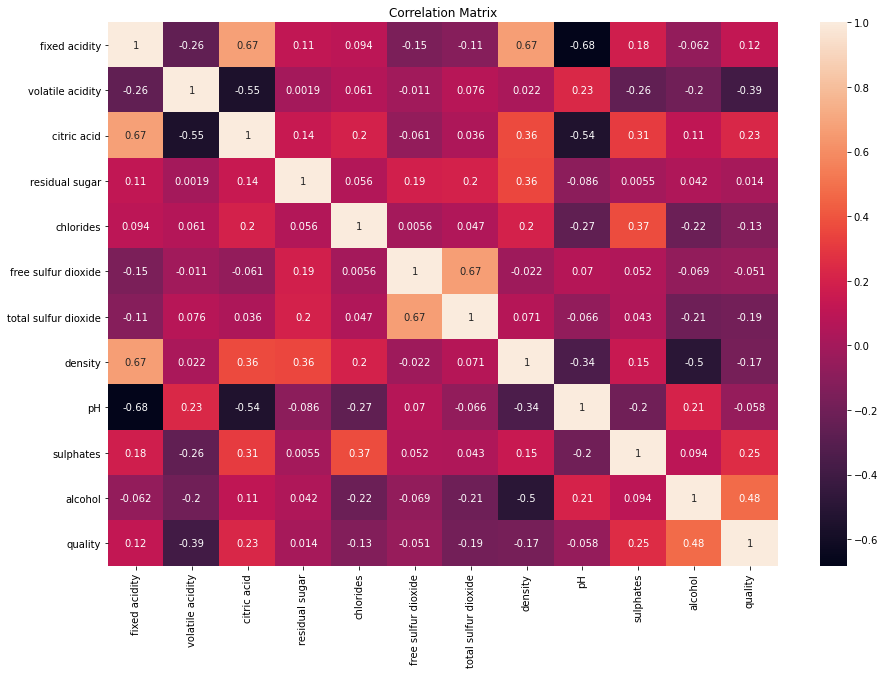

In [16]:
corr_mat=df.corr()
plt.figure(figsize=[15,10])
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [17]:
#Observation: Here few variables are strongly related to quality.

Create classifucation version of good quality

In [18]:
df['good']=[1 if x>=7 else 0 for x in df['quality']]

In [19]:
x=df.drop(['quality'],axis=1)
y=df['good']

In [20]:
#see proportion of good vs bad wine

In [21]:
df['good'].value_counts()

0    1382
1     217
Name: good, dtype: int64

In [22]:
#test train splitting 

In [23]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=.7,random_state=50)

In [24]:
lr=LogisticRegression()

In [25]:
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
predlr=lr.predict(x_test)

In [27]:
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9982142857142857
[[968   0]
 [  2 150]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       968
           1       1.00      0.99      0.99       152

    accuracy                           1.00      1120
   macro avg       1.00      0.99      1.00      1120
weighted avg       1.00      1.00      1.00      1120



# Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)


In [29]:
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

1.0
[[968   0]
 [  0 152]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       968
           1       1.00      1.00      1.00       152

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120



# Random forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)


In [31]:
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[968   0]
 [  0 152]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       968
           1       1.00      1.00      1.00       152

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120



# AdaBoost Classifier

In [36]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier(n_estimators=100)
ada_classifier.fit(x_train, y_train)
pred_ada = ada_classifier.predict(x_test)




In [37]:
print(accuracy_score(y_test,pred_ada))
print(confusion_matrix(y_test,pred_ada))
print(classification_report(y_test,pred_ada))

1.0
[[968   0]
 [  0 152]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       968
           1       1.00      1.00      1.00       152

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120



In [ ]:
Conclusion : As all the models(AdaBoost, DecisionTree, Random Forest Classifier) are giving good accuracy.
    